In [1]:
!python ptycho/simtrain.py 4

/bin/bash: /home/ollie/anaconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Traceback (most recent call last):
  File "/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/simtrain.py", line 3, in <module>
    from . import datasets
ImportError: attempted relative import with no known parent package


In [2]:
from glob import glob

prefixes = glob('outputs/*/')

params_paths = glob('outputs/*/params.dill')

hpaths = glob('outputs/*/history.dill')

def load_dill(path):
    with open(path, 'rb') as f:
        return dill.load(f)

import dill

params = [load_dill(p) for p in params_paths]

import pandas as pd
import matplotlib.pyplot as plt
histories =  pd.DataFrame({pdict['offset']: load_dill(p)['val_loss'] for pdict, p in zip(params, hpaths)}).sort_index(axis =1)

Text(0.5, 0, 'offset')

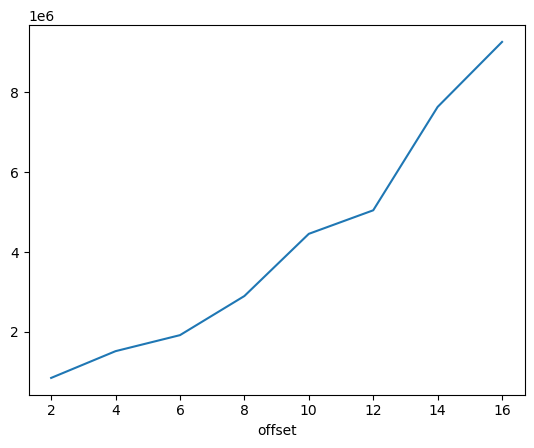

In [3]:
losses = histories.iloc[-1]
losses.plot()
plt.xlabel('offset')

In [5]:
mask = np.absolute(p.cfg['probe_mask'][:, :, 0])

In [6]:
def pm():
    yield 1
    yield -1
#     yield 1, 1
# #     yield 1, -1
#     yield -1, -1
# #     yield -1, 1

In [7]:
mask = mask.astype(bool)

In [8]:
def overlap_probe(offset):
    res = np.zeros_like(mask)
    for i in pm():
        res ^= (np.roll(mask, (i * offset // 2, 0), axis = (0, 1)))
    return res
#     plt.imshow(res, cmap = 'jet', vmax = mask.max())
    
def _offset_to_overlap(offset):
    overlapped = overlap_probe(offset)
    return 1. - ((overlapped.sum() / mask.sum()) / 2)

def offset_to_overlap(offsets):
    return np.array([_offset_to_overlap(o) for o in offsets])

In [9]:
df = pd.DataFrame(losses)
df = df.reset_index()
df.columns = ['offset', 'diffraction NLL']


df['overlap'] = offset_to_overlap(df['offset'])
df['inference time (norm.)'] = (1 / df['offset'])**2
df['inference time (norm.)'] /= df['inference time (norm.)'].max()

In [11]:
df

,offset,diffraction NLL,overlap,inference time (norm.)
0,2,841460.125,0.842365,1.000000
1,4,1512689.625,0.684729,0.250000
2,6,1914242.750,0.527094,0.111111
3,8,2895401.500,0.369458,0.062500
4,10,4455027.000,0.221675,0.040000
5,12,5045445.000,0.073892,0.027778
6,14,7638499.000,-0.073892,0.020408
7,16,9268222.000,-0.211823,0.015625


In [20]:
df['diffraction NLL'] - df['diffraction NLL'].min()

0          0.000
1     671229.500
2    1072782.625
3    2053941.375
4    3613566.875
5    4203984.875
6    6797038.875
7    8426761.875
Name: diffraction NLL, dtype: float64

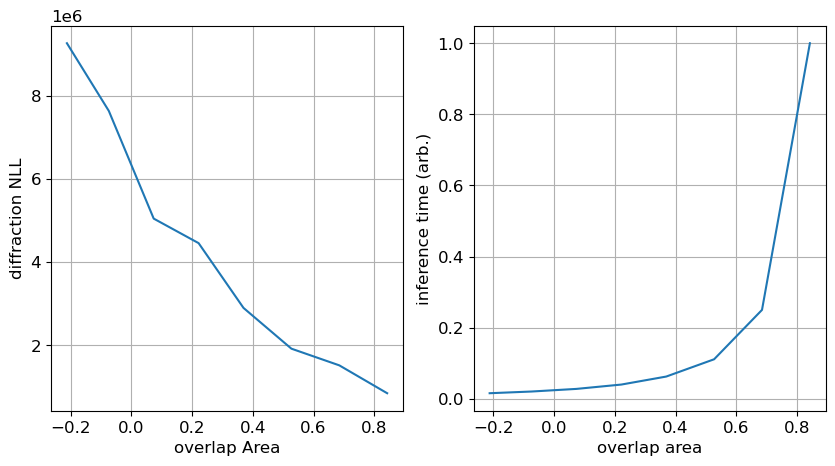

In [28]:
plt.rcParams["figure.figsize"] = (10,5)

a, b = 1, 2
plt.subplot(a, b, 1)
plt.plot(df['overlap'], (df['diffraction NLL']))
plt.xlabel('overlap Area')
plt.ylabel('diffraction NLL')
plt.grid()

plt.subplot(a, b, 2)
plt.plot(df['overlap'], df['inference time (norm.)'])
plt.xlabel('overlap area')
plt.ylabel('inference time (arb.)')
plt.grid()

In [26]:
df

,offset,diffraction NLL,overlap,inference time (norm.)
0,2,841460.125,0.842365,1.000000
1,4,1512689.625,0.684729,0.250000
2,6,1914242.750,0.527094,0.111111
3,8,2895401.500,0.369458,0.062500
4,10,4455027.000,0.221675,0.040000
5,12,5045445.000,0.073892,0.027778
6,14,7638499.000,-0.073892,0.020408
7,16,9268222.000,-0.211823,0.015625


/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


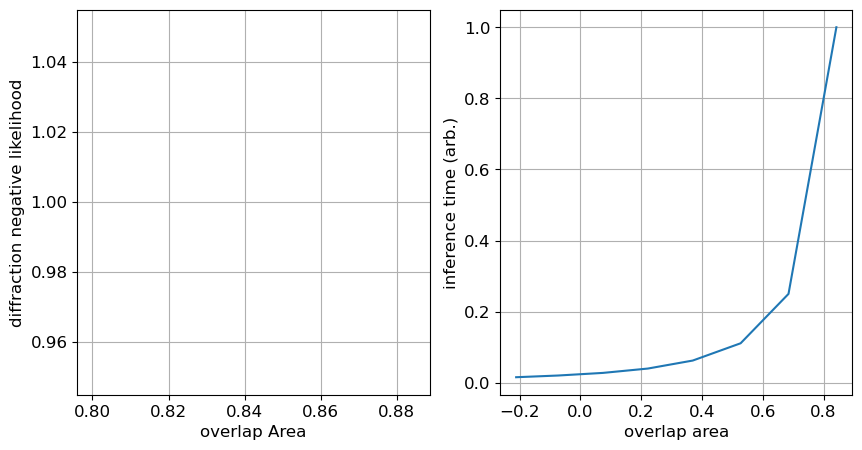

In [27]:
plt.rcParams["figure.figsize"] = (10,5)

a, b = 1, 2
plt.subplot(a, b, 1)
plt.plot(df['overlap'], np.exp(100 * (df['diffraction NLL'] - df['diffraction NLL'].min())))
plt.xlabel('overlap Area')
plt.ylabel('diffraction negative likelihood')
plt.grid()

plt.subplot(a, b, 2)
plt.plot(df['overlap'], df['inference time (norm.)'])
plt.xlabel('overlap area')
plt.ylabel('inference time (arb.)')
plt.grid()

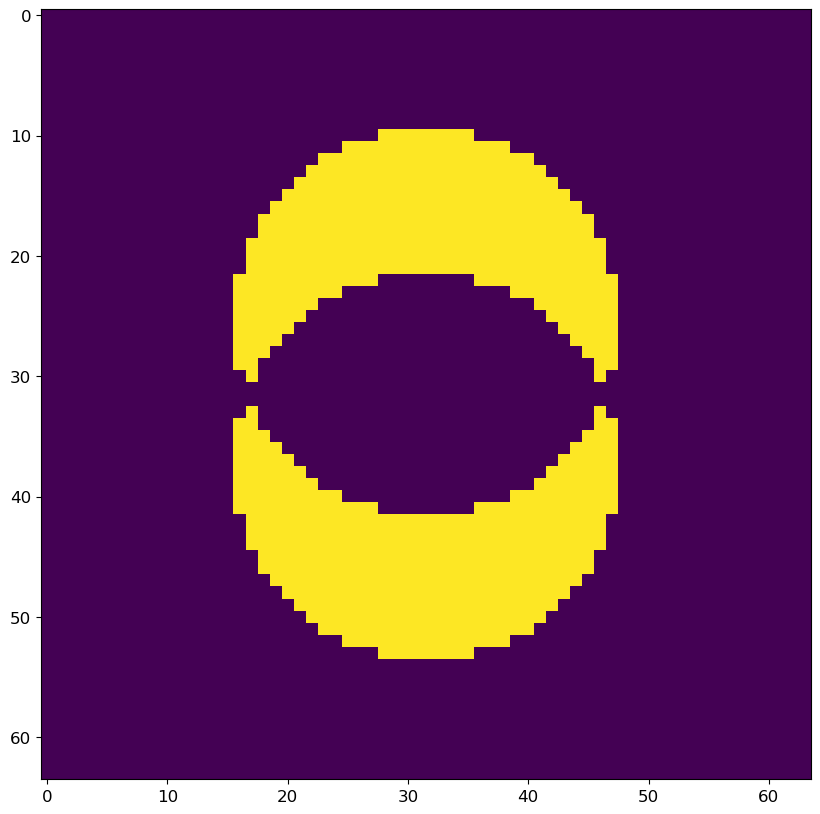

In [75]:
plt.imshow(overlap_probe(12))

In [21]:
# params[2]['offset']

# import sys
# import argparse

# sys.argv = ['2']

4

In [1]:
from ptycho import params as p
p.cfg['offset'] = 4
p.cfg['nepochs'] = 20
p.cfg['output_prefix'] = 'tmp'
p.cfg

{'N': 64,
 'offset': 4,
 'gridsize': 2,
 'bigoffset': 4,
 'batch_size': 16,
 'nepochs': 20,
 'h': 64,
 'w': 64,
 'intensity_scale.trainable': False,
 'probe.trainable': False,
 'n_filters_scale': 2,
 'output_prefix': 'tmp'}

In [2]:
from ptycho.simtrain import *

/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-01-30 14:16:22.435504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-30 14:16:22.539710: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-30 14:16:22.883661: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


1.000002
nphoton 8.976986
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 intensity_scaler (IntensitySca  (None, 64, 64, 4)   1           ['input[0][0]']                  
 ler)                                                                                             
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['intensity_scaler[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['c

                                                                                                  
Total params: 4,404,873
Trainable params: 4,400,776
Non-trainable params: 4,097
__________________________________________________________________________________________________
None


2023-01-30 14:17:44.549020: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-01-30 14:17:44.549035: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-01-30 14:17:44.549064: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-01-30 14:17:44.551640: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-01-30 14:17:44.626525: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-01-30 14:17:44.626867: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/20


2023-01-30 14:17:50.441246: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


732/732 [==============================] - 15s 16ms/step - loss: 70818952.0000 - trimmed_obj_loss: 0.1366 - pred_diff_channels_loss: 85.2342 - distribution_lambda_loss: 70818952.0000 - probe_illumination_loss: 0.0047 - val_loss: 44186572.0000 - val_trimmed_obj_loss: 0.1321 - val_pred_diff_channels_loss: 84.5539 - val_distribution_lambda_loss: 44186572.0000 - val_probe_illumination_loss: 0.0047 - lr: 0.0010
Epoch 2/20
732/732 [==============================] - 11s 15ms/step - loss: 31549302.0000 - trimmed_obj_loss: 0.1296 - pred_diff_channels_loss: 85.2336 - distribution_lambda_loss: 31549302.0000 - probe_illumination_loss: 0.0047 - val_loss: 18436432.0000 - val_trimmed_obj_loss: 0.1254 - val_pred_diff_channels_loss: 84.5536 - val_distribution_lambda_loss: 18436432.0000 - val_probe_illumination_loss: 0.0047 - lr: 0.0010
Epoch 3/20
732/732 [==============================] - 11s 15ms/step - loss: 17663144.0000 - trimmed_obj_loss: 0.1233 - pred_diff_channels_loss: 85.2334 - distribution_la

Epoch 20/20
729/732 [============================>.] - ETA: 0s - loss: 2864239.7500 - trimmed_obj_loss: 0.1308 - pred_diff_channels_loss: 85.2300 - distribution_lambda_loss: 2864239.7500 - probe_illumination_loss: 0.0047
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
129/129 [==============================] - 9s 67ms/step


TypeError: 'module' object is not subscriptable

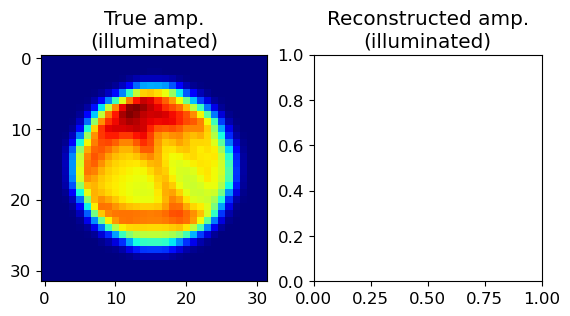

In [3]:
# Offset 4
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

phase min: -0.041521035 phase max: 0.054786596


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


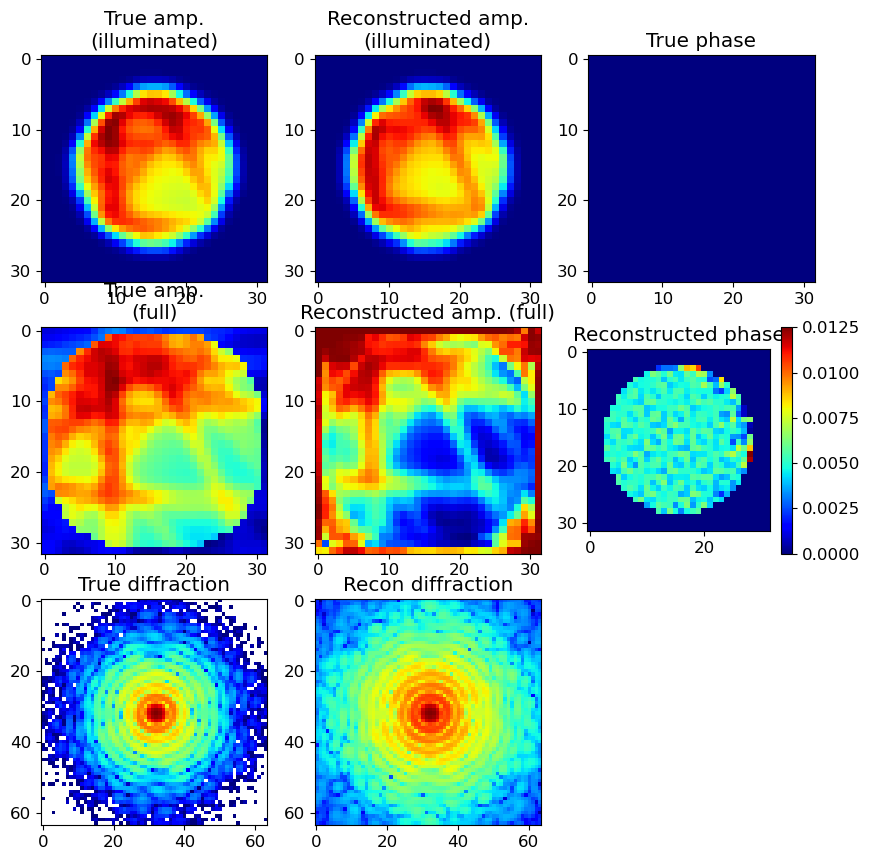

In [5]:
# Offset 4
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

phase min: -0.087284155 phase max: 0.07144611


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


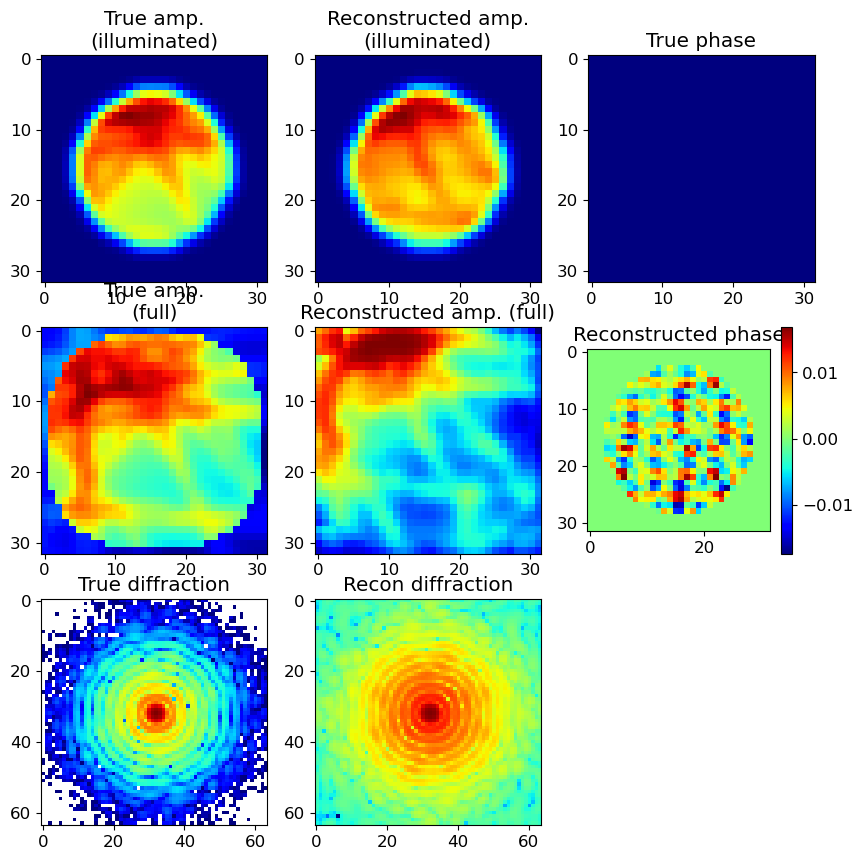

In [6]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

In [5]:
YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright].shape

(317, 317, 1)

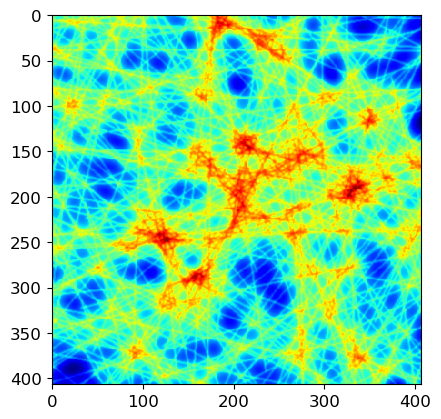

In [4]:
bordersize = N // 2 - bigoffset // 4
clipsize = (bordersize + ((gridsize - 1) * offset) // 2)

plt.imshow(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright], interpolation = 'none',
          cmap = 'jet')
vmin = np.min(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])
vmax = np.max(YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright])

In [5]:
from ptycho import evaluation

Offset 8

phase min: -0.037509844 phase max: 0.09267076


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


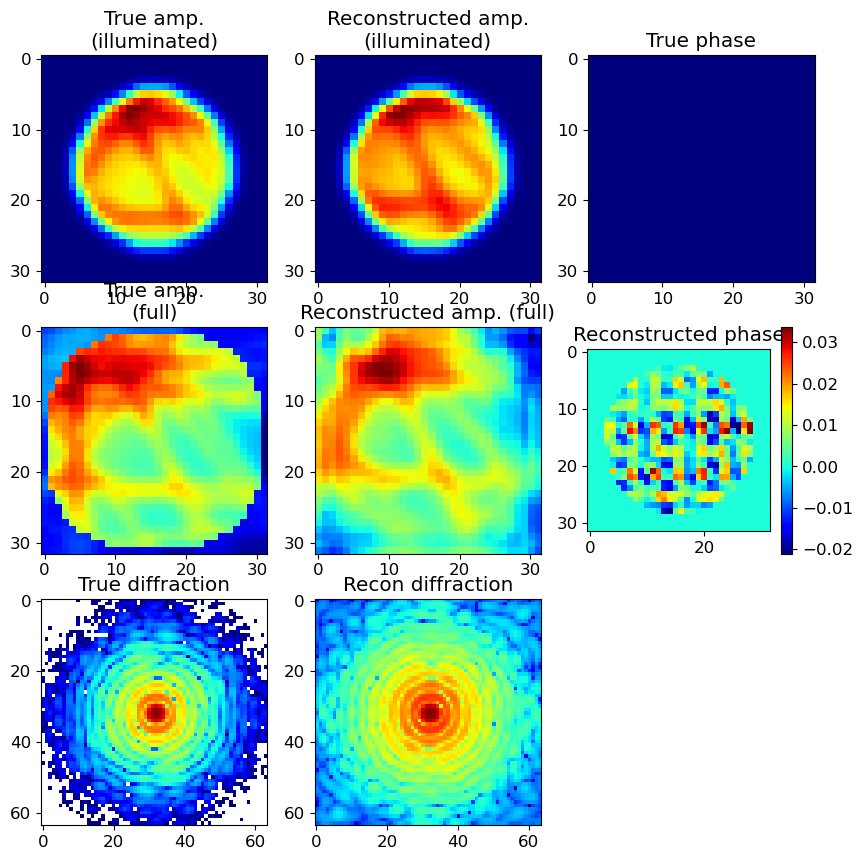

In [6]:
#plt_metrics()
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

Offset 10

phase min: -0.1137828 phase max: 0.1211003


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


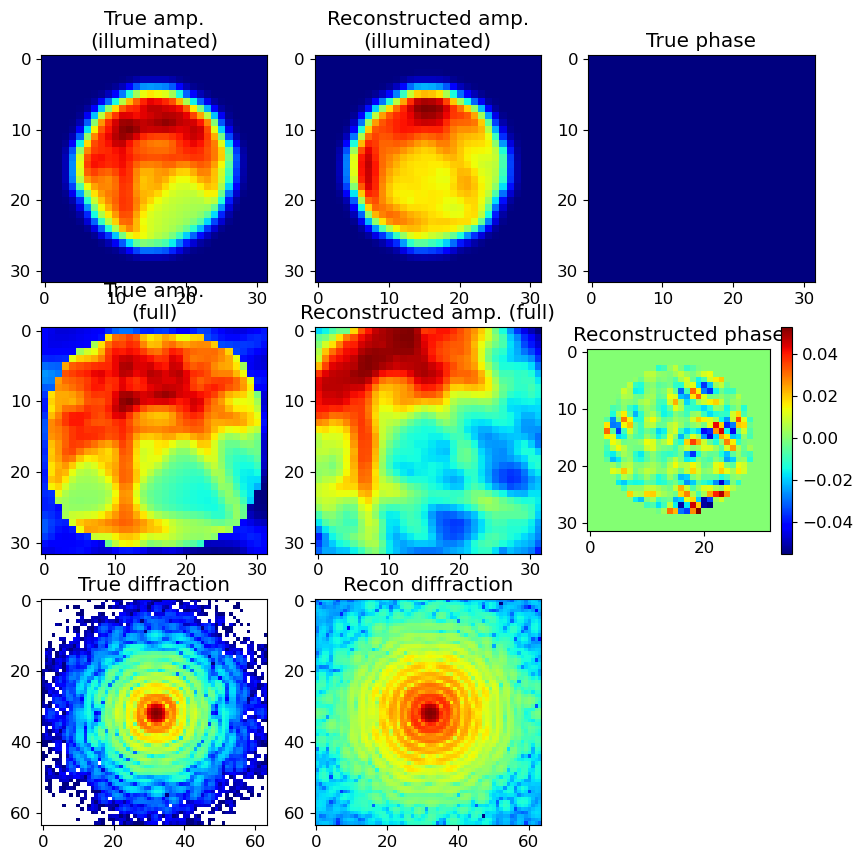

In [6]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

Offset 12

phase min: -0.13856006 phase max: 0.14993173


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


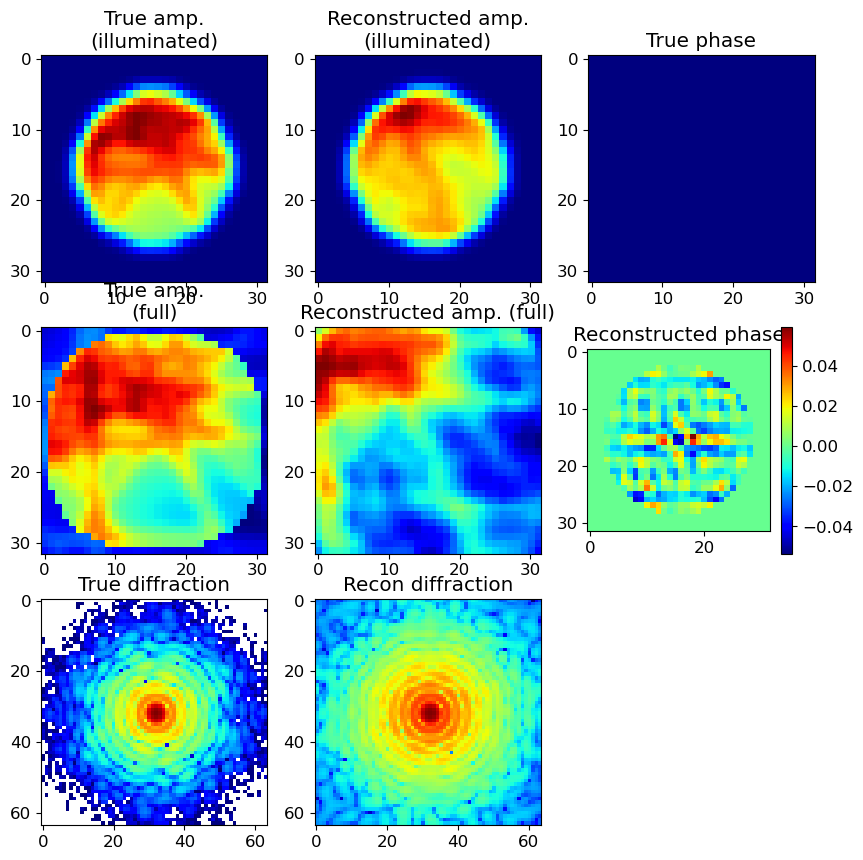

In [6]:
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

phase min: -0.64635056 phase max: 0.78957057


/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py:57: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_test)[i, :, :, channel], cmap = 'jet')


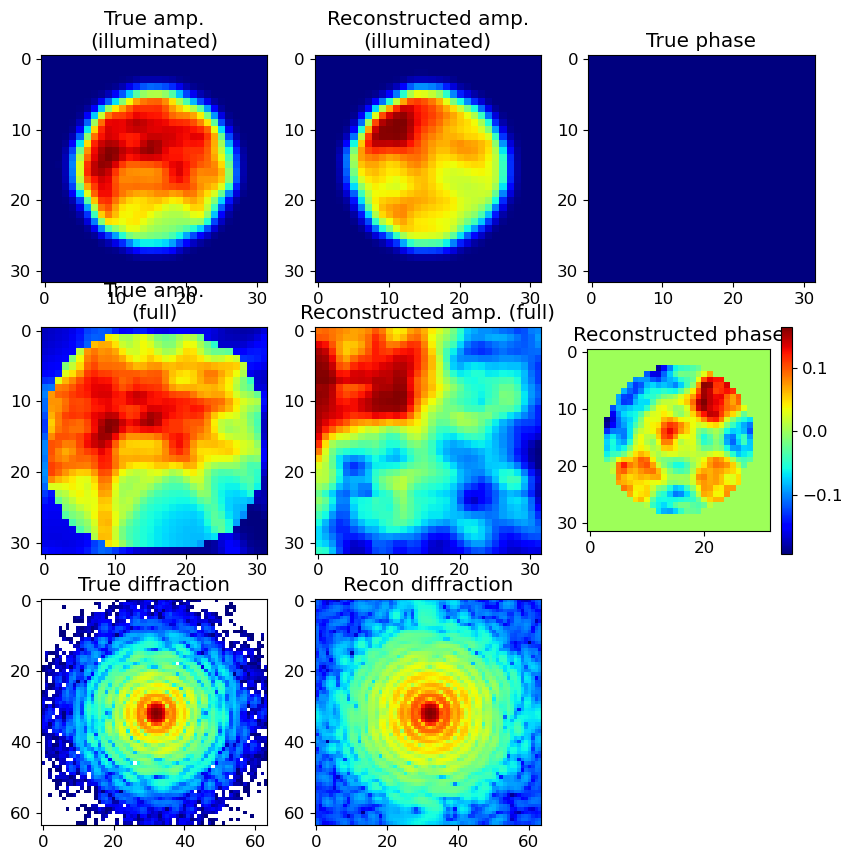

In [3]:
# offset 16
from ptycho import evaluation
evaluation.summarize(10, a, b, X_test, Y_I_test, Y_phi_test, probe, 0)

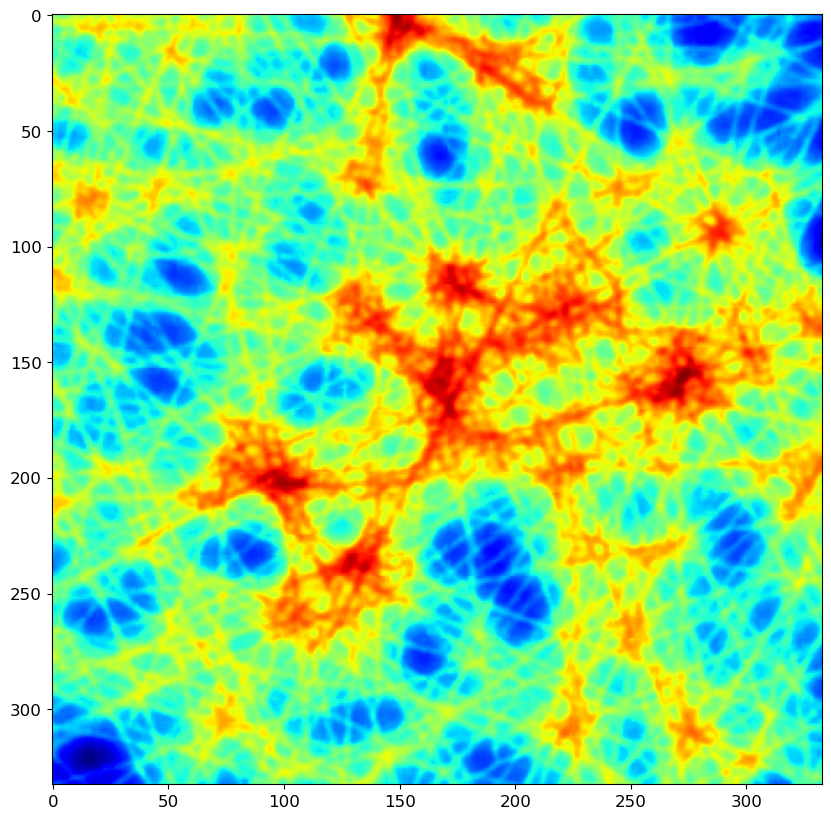

In [7]:
# offset 4
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet')

In [113]:
df

,offset,diffraction NLL,overlap,inference time (norm.)
0,2,841460.125,0.842365,1.000000
1,4,1512689.625,0.684729,0.250000
2,6,1914242.750,0.527094,0.111111
3,8,2895401.500,0.369458,0.062500
4,10,4455027.000,0.221675,0.040000
5,12,5045445.000,0.073892,0.027778
6,16,9268222.000,-0.211823,0.015625


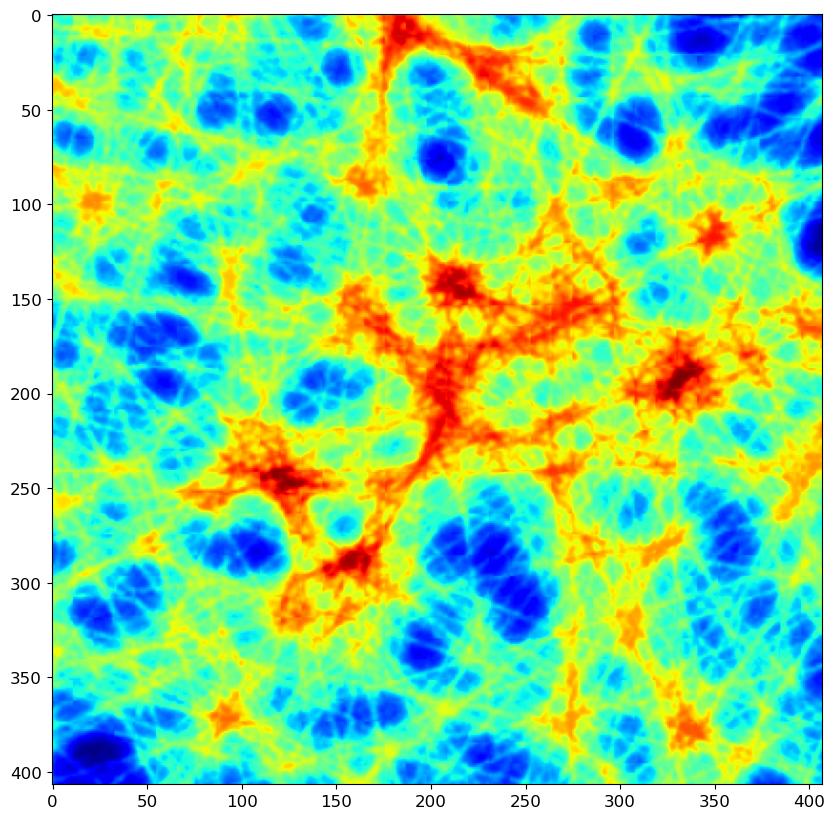

In [7]:
# offset 12
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet')

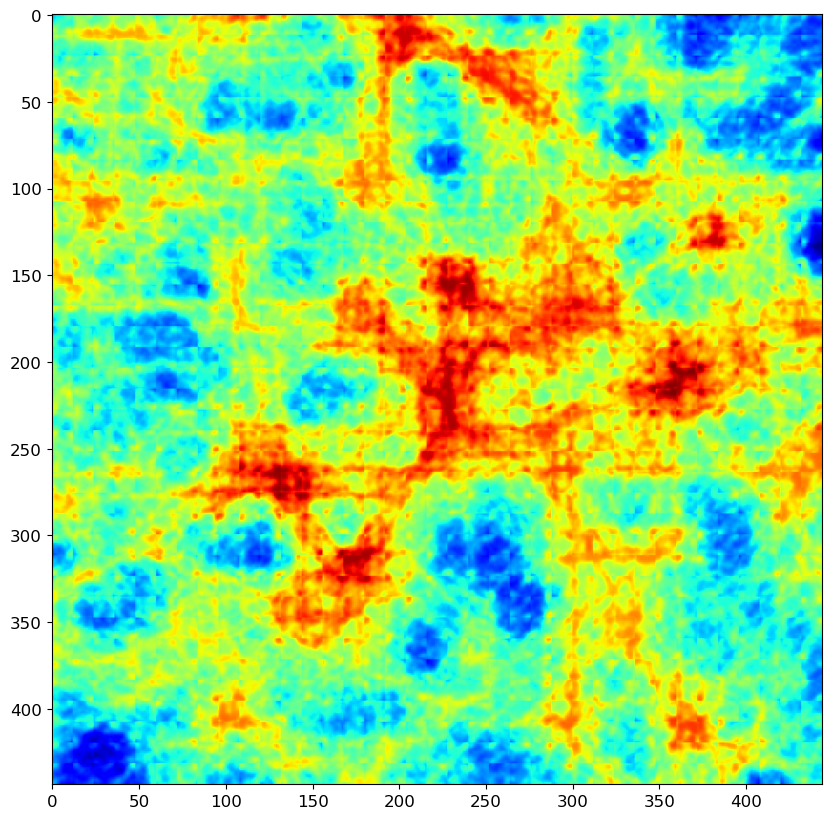

In [4]:
# offset 16
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet')

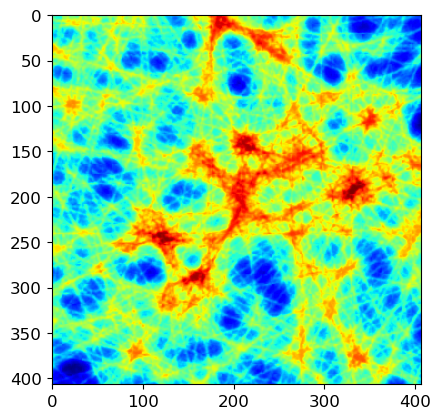

In [5]:
import matplotlib.pyplot as plt
plt.imshow(stitched[0], cmap = 'jet')

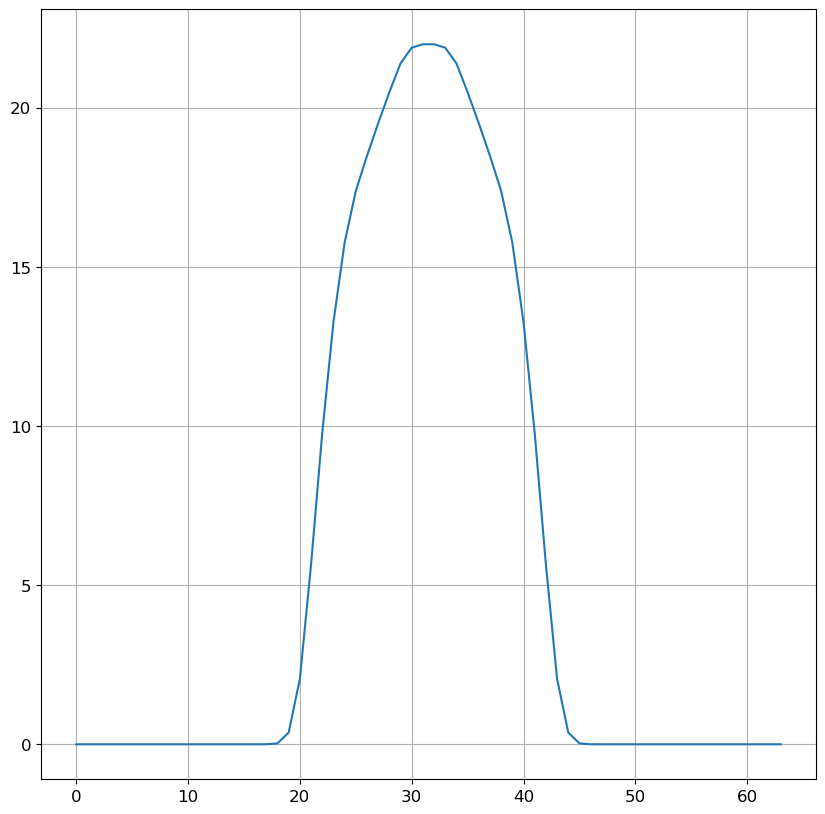

In [11]:
plt.plot(probe.sum(axis = 0))
plt.grid()